In [8]:

##Importing required packages.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns



In [2]:
#Loading dataset
wine_q = pd.read_csv('C:\\Users\\venkat333\\Desktop\\tasks\\winequality-red.csv')

In [3]:
#Let's check how the data is distributed
wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the null values
wine_q.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#describing the data
wine_q.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking the  datatypes
wine_q.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [37]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_q['quality'] = pd.cut(wine_q['quality'], bins = bins, labels = group_names)

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [41]:
#Bad becomes 0 and good becomes 1 
wine_q['quality'] = label_quality.fit_transform(wine_q['quality'])

In [42]:
wine_q['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

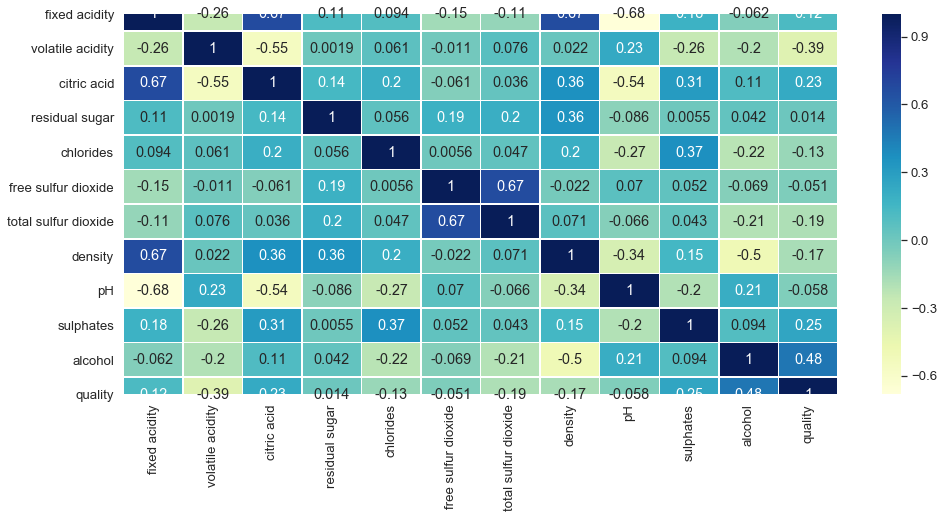

In [9]:
plt.figure(figsize = (16,7))
sns.set(font_scale=1.2)
sns.heatmap(wine_q.corr(), annot=True, linewidths=0.5, cmap='YlGnBu')

In [11]:
#checking the columns names
wine_q.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
#importing requires libaraies
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [13]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

5    467
6    453
7    141
4     37
8     13
3      8
dtype: int64
5    214
6    185
7     58
4     16
8      5
3      2
dtype: int64


In [26]:
##Applying Standard scaling to get optimized result
from sklearn.preprocessing import StandardScaler

In [28]:
y = wine_q['quality']

In [30]:
x= wine_q.drop(['quality'],axis = 1)

In [31]:
scalar = StandardScaler()
scalar.fit_transform(x)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [32]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2, random_state=123)

In [44]:
trainx =scalar.fit_transform(trainx)
testx =scalar.fit_transform(testx)

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(trainx, trainy)
pred_rfc = rfc.predict(testx)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
#Let's see how our model performed
print(classification_report(testy, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.67      0.73      0.70       131
           6       0.59      0.68      0.63       131
           7       0.65      0.44      0.52        39
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.60      0.63      0.61       320



F:\installitations\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
#Confusion matrix for the random forest classification
print(confusion_matrix(testy, pred_rfc))

[[ 0  0  1  0  0  0]
 [ 0  0  7  6  0  0]
 [ 0  0 96 34  1  0]
 [ 0  0 37 89  5  0]
 [ 0  0  2 20 17  0]
 [ 0  0  0  2  3  0]]


# Stochastic Gradiant Descent

In [51]:
from sklearn.linear_model import SGDClassifier

In [52]:
sgd = SGDClassifier(penalty=None)
sgd.fit(trainx, trainy)
pred_sgd = sgd.predict(testx)

In [53]:
print(classification_report(testy
                            , pred_sgd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.58      0.78      0.67       131
           6       0.52      0.51      0.51       131
           7       0.17      0.05      0.08        39
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.21      0.22      0.21       320
weighted avg       0.47      0.53      0.49       320



F:\installitations\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM


In [54]:
from sklearn.svm import SVC

In [55]:
svc = SVC()
svc.fit(trainx, trainy)
pred_svc = svc.predict(testx)

In [56]:
print(classification_report(testy, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.61      0.73      0.66       131
           6       0.53      0.59      0.56       131
           7       0.50      0.21      0.29        39
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.27      0.25      0.25       320
weighted avg       0.53      0.57      0.54       320



F:\installitations\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [60]:
#Finding best parameters for our SVC model
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(trainx, trainy)

F:\installitations\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
F:\installitations\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.2, 'kernel': 'rbf'}

In [62]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(trainx,trainy)
pred_svc2 = svc2.predict(testx)
print(classification_report(testy, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.68      0.77      0.72       131
           6       0.61      0.71      0.66       131
           7       0.65      0.33      0.44        39
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.30      0.30       320
weighted avg       0.61      0.65      0.62       320



F:\installitations\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
rfc_eval = cross_val_score(estimator = rfc, X = trainx, y = trainy, cv = 10)
rfc_eval.mean()

F:\installitations\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7090414888182581